# Necessary imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import pandas as pd
import glob
import random
import os
from tifffile import imsave
import splitfolders
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from torch.nn import CrossEntropyLoss
from matplotlib import pyplot as plt
import random
mmscaler = MinMaxScaler()
import pandas as pd
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from random import shuffle
import PIL
from PIL import Image
import copy
import cv2
import glob
import cv2
import os 
from os import path
from skimage.color import lab2rgb
import torch.nn as nn
from torch.autograd import Variable
from torch.nn import MaxPool3d
from torch.nn import AvgPool3d
from torch.nn import Linear, ReLU, MSELoss, Sequential, Conv2d, Conv3d, ConvTranspose3d, BatchNorm3d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout, ConvTranspose2d
from torch.optim import Adam, SGD
from math import log10, sqrt
import numpy as np
from skimage.metrics import structural_similarity
import argparse
import imutils
torch.set_default_tensor_type('torch.FloatTensor')

In [7]:
train_path_images = 'BraTS2020_TrainingData/input_data_128/train/images'
train_path_masks = 'BraTS2020_TrainingData/input_data_128/train/masks'

In [8]:
all_train_images = []
for file in os.listdir(train_path_images):
    img = np.load(train_path_images+'/'+file)
    all_train_images.append(img)
all_train_images = np.asarray(all_train_images)
all_train_masks = []
for file in os.listdir(train_path_masks):
    img = np.load(train_path_masks+'/'+file)
    all_train_masks.append(img)
all_train_masks = np.asarray(all_train_masks)

# Slicing the 3D images and masks to get 2D images and masks

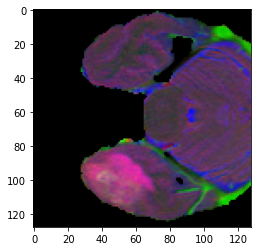

In [21]:
plt.imshow(all_train_images[6][:,:,32])

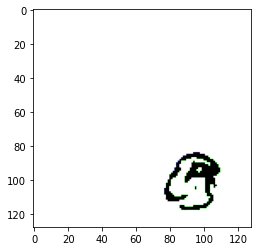

In [22]:
plt.imshow(all_train_masks[6][:,:,32])

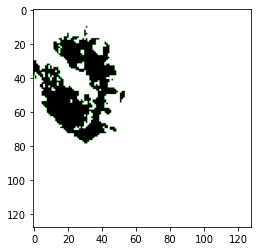

In [40]:
plt.imshow(all_train_masks[0][:,:,64])

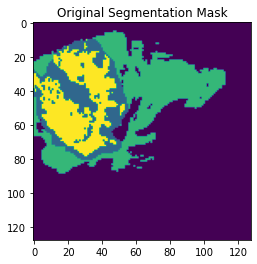

In [9]:
or_seg_mask = np.argmax(all_train_masks[0],axis=3)
plt.imshow(or_seg_mask[:,:,64])
plt.title('Original Segmentation Mask')
plt.show()

# Reconstructing the 2D mask to get back original 3D mask

In [42]:
new_image = []
for i in range(128):
    new_image.append(test_mask[:,:,i])
new_image=np.array(new_image)
new_image = np.moveaxis(new_image,0,2)

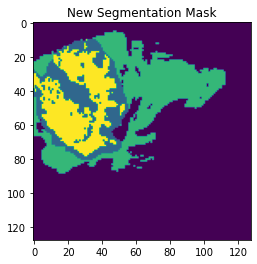

In [43]:
new_seg_mask = np.argmax(new_image,axis=3)
plt.imshow(new_seg_mask[:,:,64])
plt.title('New Segmentation Mask')
plt.show()

# Extracting 2D images by slicing and saving them in train/images directory

In [ ]:
cd '/home/dsnikhil/DL Project 3/train/images'

In [47]:
for mri_number in range(all_train_images.shape[0]):
    for image_number in range(all_train_images[mri_number].shape[2]):
        np.save('MRI_{}_image_{}.npy'.format(mri_number,image_number),all_train_images[mri_number][:,:,image_number])

# Extracting 2D masks by slicing and saving them in train/masks directory

In [48]:
cd '/home/dsnikhil/DL Project 3/train/masks'

/home/dsnikhil/DL Project 3/train/masks


In [49]:
for mri_number in range(all_train_masks.shape[0]):
    for mask_number in range(all_train_masks[mri_number].shape[2]):
        np.save('MRI_{}_mask_{}.npy'.format(mri_number,mask_number),all_train_masks[mri_number][:,:,mask_number])

# Extracting 2D images by slicing and saving them in val2/images directory

In [56]:
cd '/home/dsnikhil/DL Project 3/val2/images'

/home/dsnikhil/DL Project 3/val2/images


In [53]:
for mri_number in range(all_val_images.shape[0]):
    for image_number in range(all_val_images[mri_number].shape[2]):
        np.save('val_MRI_{}_image_{}.npy'.format(mri_number,image_number),all_val_images[mri_number][:,:,image_number])

# Extracting 2D masks by slicing and saving them in val2/masks directory

In [59]:
cd '/home/dsnikhil/DL Project 3/val2/masks'

/home/dsnikhil/DL Project 3/val2/masks


In [60]:
for mri_number in range(all_val_masks.shape[0]):
    for mask_number in range(all_val_masks[mri_number].shape[2]):
        np.save('val_MRI_{}_mask_{}.npy'.format(mri_number,mask_number),all_val_masks[mri_number][:,:,mask_number])